In [1]:
import lsst.daf.persistence as dafPersist
import matplotlib.pyplot as plt
import numpy as np

import lsst.afw.table as afwTable
import lsst.afw.geom as afwGeom
import Utils.DiaSourceTools as DSTools
from astropy.time import Time

import lsst.afw.display.ds9 as ds9

import re

from multiprocessing import Pool
from functools import partial
import lsst.daf.persistence as dafPersist

In [3]:
DATADIR="/datadec/cppm/jpreyes/CFHT_Tests"
directory = DATADIR+"/tests/"
butler = dafPersist.Butler(directory) 
filter = 'r'


In [4]:
visits = [780355,780353,780352,780354,780356,800717,800718,802229,802230,800719,801145,802227,802231,800720,802228]

In [5]:
airMasses = []
for v in visits:
    am_ccd = []
    for c in range(14,15):
        
        try:
            if butler.datasetExists("calexp", dataId={"filter":'r',"ccd":c, "visit":int(v)}):
                dayDiff = butler.get("calexp", dataId={"filter":'r',"ccd":c, "visit":int(v)})
                m = dayDiff.getMetadata()
                print(m.toString())
                am_ccd.append(m.get("AIRMASS"))
        except Exception as e:
            #print e
            pass
    airMasses.append(am_ccd)

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 780355o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "Processing Pipeline", "-------------------", "Unique detector IDs for MegaCam (North on top, East to the left)", "   ----

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 780353o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "Processing Pipeline", "-------------------", "Unique detector IDs for MegaCam (North on top, East to the left)", "   ----

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 780352o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "Processing Pipeline", "-------------------", "Unique detector IDs for MegaCam (North on top, East to the left)", "   ----

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 780354o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "Processing Pipeline", "-------------------", "Unique detector IDs for MegaCam (North on top, East to the left)", "   ----

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 780356o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "Processing Pipeline", "-------------------", "Unique detector IDs for MegaCam (North on top, East to the left)", "   ----

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 800717o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "RA/DEC are current telescope position", "including handset corrections", "OBJxxx are original target position", "plus pro

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 800718o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "RA/DEC are current telescope position", "including handset corrections", "OBJxxx are original target position", "plus pro

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 802229o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "RA/DEC are current telescope position", "including handset corrections", "OBJxxx are original target position", "plus pro

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 802230o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "RA/DEC are current telescope position", "including handset corrections", "OBJxxx are original target position", "plus pro

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 800719o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "RA/DEC are current telescope position", "including handset corrections", "OBJxxx are original target position", "plus pro

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 801145o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "RA/DEC are current telescope position", "including handset corrections", "OBJxxx are original target position", "plus pro

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 802227o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "RA/DEC are current telescope position", "including handset corrections", "OBJxxx are original target position", "plus pro

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 802231o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "RA/DEC are current telescope position", "including handset corrections", "OBJxxx are original target position", "plus pro

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 800720o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "RA/DEC are current telescope position", "including handset corrections", "OBJxxx are original target position", "plus pro

SIMPLE = 1
// file does conform to FITS standard
BITPIX = 8
// number of bits per data pixel
NAXIS = 0
// number of data axes
EXTEND = 1
// FITS dataset may contain extensions
COMMENT = [ "  FITS (Flexible Image Transport System) format is defined in 'Astronomy", "  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 802228o29, raster FULL, etype OBJECT, etime 300, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "RA/DEC are current telescope position", "including handset corrections", "OBJxxx are original target position", "plus pro

In [25]:
sset = butler.subset("calexp", dataId={"filter":"r"})
ZPoints = []
for ref in sset:
    did =  ref.dataId
    if butler.datasetExists("calexp", dataId=ref.dataId):
         dayDiff = butler.get("calexp", dataId=ref.dataId, immediate=False)
         m = dayDiff.getMetadata()
         ZPoints.append(m.get("PHOT_C"))
    

NotFoundError: PHOT_C not found

In [33]:
m.toString()

u'SIMPLE = 1\n// file does conform to FITS standard\nBITPIX = 8\n// number of bits per data pixel\nNAXIS = 0\n// number of data axes\nEXTEND = 1\n// FITS dataset may contain extensions\nCOMMENT = [ "  FITS (Flexible Image Transport System) format is defined in \'Astronomy", "  and Astrophysics\', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 912464o70, raster FULL, etype OBJECT, etime 360, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "RA/DEC are current telescope position", "including handset corrections", "OBJxxx are original target position

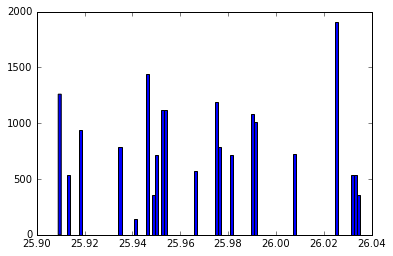

In [29]:
plt.hist(ZPoints, bins=100)
plt.show()

In [36]:
m.toString()

u'SIMPLE = 1\n// file does conform to FITS standard\nBITPIX = 8\n// number of bits per data pixel\nNAXIS = 0\n// number of data axes\nEXTEND = 1\n// FITS dataset may contain extensions\nCOMMENT = [ "  FITS (Flexible Image Transport System) format is defined in \'Astronomy", "  and Astrophysics\', volume 376, page 359; bibcode: 2001A&A...376..359H", "Observation Summary", "-------------------", "file 912197o01, raster FULL, etype OBJECT, etime 520, filter filter_name", " Fully Characterized and Analysed by Elixir @ CFHT", "Unique amplifier IDs for MegaCam:", "-- -- 00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 -- --", "72 73 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 74 75", "76 77 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 78 79", "-- -- 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 -- --", "Detector", "--------", "Telescope", "---------", "RA/DEC are current telescope position", "including handset corrections", "OBJxxx are original target position

In [ ]:
sset = butler.subset("calexp", dataId={"filter":"i"})
ZPoints = []
for ref in sset:
    did =  ref.dataId
    if butler.datasetExists("calexp", dataId=ref.dataId):
        dayDiff = butler.get("calexp", dataId=ref.dataId, immediate=True)
        m = dayDiff.getMetadata()
        try:
            ZPoints.append(m.get("PHOT_C"))
        except Exception:
            ZPoints.append(m.get("MAGZERO_NOBJ"))
    

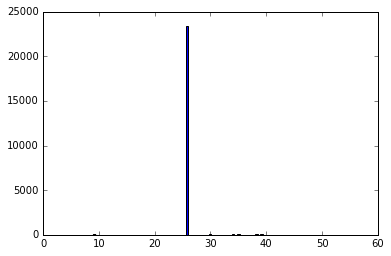

In [39]:
plt.hist(ZPoints, bins=100)
plt.show()

In [ ]:
sset = butler.subset("calexp", dataId={"filter":"g"})
ZPoints = []
for ref in sset:
    did =  ref.dataId
    if butler.datasetExists("calexp", dataId=ref.dataId):
        dayDiff = butler.get("calexp", dataId=ref.dataId, immediate=True)
        m = dayDiff.getMetadata()
        try:
            ZPoints.append(m.get("PHOT_C"))
        except Exception:
            ZPoints.append(m.get("MAGZERO_NOBJ"))
    

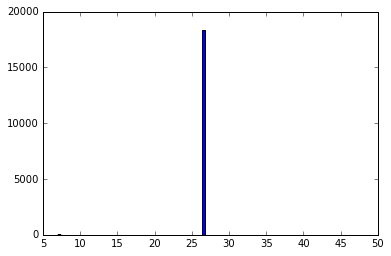

In [42]:
plt.hist(ZPoints, bins=100)
plt.show()

In [43]:
sset = butler.subset("calexp", dataId={"filter":"z"})
ZPoints = []
for ref in sset:
    did =  ref.dataId
    if butler.datasetExists("calexp", dataId=ref.dataId):
        dayDiff = butler.get("calexp", dataId=ref.dataId, immediate=True)
        m = dayDiff.getMetadata()
        try:
            ZPoints.append(m.get("PHOT_C"))
        except Exception:
            ZPoints.append(m.get("MAGZERO_NOBJ"))
    

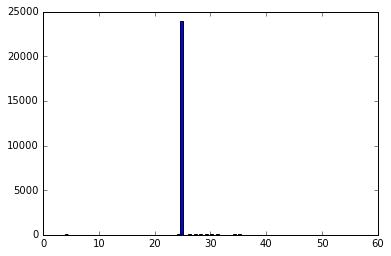

In [44]:
plt.hist(ZPoints, bins=100)
plt.show()

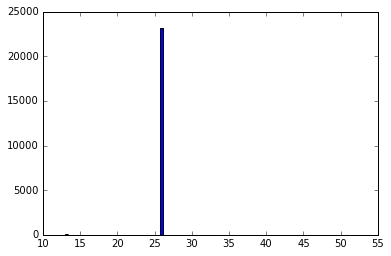

In [46]:
sset = butler.subset("calexp", dataId={"filter":"r"})
ZPoints = []
for ref in sset:
    did =  ref.dataId
    if butler.datasetExists("calexp", dataId=ref.dataId):
        dayDiff = butler.get("calexp", dataId=ref.dataId, immediate=True)
        m = dayDiff.getMetadata()
        try:
            ZPoints.append(m.get("PHOT_C"))
        except Exception:
            ZPoints.append(m.get("MAGZERO_NOBJ"))
            
plt.hist(ZPoints, bins=100)
plt.show()